<a href="https://colab.research.google.com/github/AnirudhA3/pcb_board/blob/main/SAM_1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==============================
# STEP 1: Install Dependencies
# ==============================
!pip install segment-anything opencv-python matplotlib torch torchvision -q

# ==============================
# STEP 2: Import Libraries
# ==============================
import torch
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

print("✅ Libraries imported successfully!")

# ==============================
# STEP 3: Download the Pretrained SAM Model (ViT-B)
# ==============================
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth

# ==============================
# STEP 4: Load the Model
# ==============================
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

print("✅ SAM model (ViT-B) loaded successfully and ready to use!")


✅ Libraries imported successfully!
✅ SAM model (ViT-B) loaded successfully and ready to use!


📤 Please upload your PCB image (e.g., pcb_sample.jpg)


Saving dummy1.jpg to dummy1 (2).jpg
✅ Image uploaded successfully: dummy1 (2).jpg


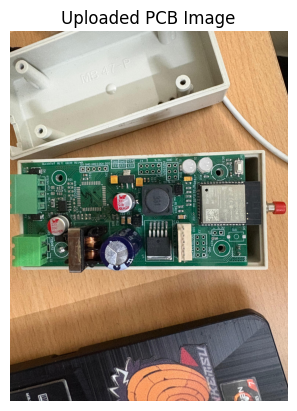

NameError: name 'sam' is not defined

In [ ]:
# ==============================
# STEP 5: Upload a PCB Image
# ==============================
from google.colab import files
import cv2
import matplotlib.pyplot as plt

print("📤 Please upload your PCB image (e.g., pcb_sample.jpg)")
uploaded = files.upload()

# Get the uploaded image filename
image_path = list(uploaded.keys())[0]
print(f"✅ Image uploaded successfully: {image_path}")

# Read and convert to RGB
image = cv2.imread(image_path)
if image is None:
    raise ValueError("❌ Image not found or failed to load. Try uploading again.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title("Uploaded PCB Image")
plt.axis('off')
plt.show()

# ==============================
# STEP 6: Run SAM for Mask Generation
# ==============================
from segment_anything import SamAutomaticMaskGenerator

mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)

print(f"✅ SAM detected {len(masks)} distinct regions/components!")

# ==============================
# STEP 7: Visualize All Segmented Masks
# ==============================
import numpy as np

mask_image = np.zeros_like(image)
for m in masks:
    color = np.random.randint(0, 255, (1, 3), dtype=np.uint8)
    mask_image[m["segmentation"]] = color

plt.figure(figsize=(10, 10))
plt.imshow(mask_image)
plt.title("SAM Segmented Regions (Each Color = Component)")
plt.axis('off')
plt.show()


In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Reload the model (no need to reinstall again)
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

print("✅ SAM model loaded and ready again!")


✅ SAM model loaded and ready again!


✅ SAM model loaded successfully!
📤 Please upload your PCB image (e.g., pcb_sample.jpg)


Saving hosa.jpeg to hosa.jpeg
✅ Image uploaded: hosa.jpeg
🧩 Resized image to: 768x1024


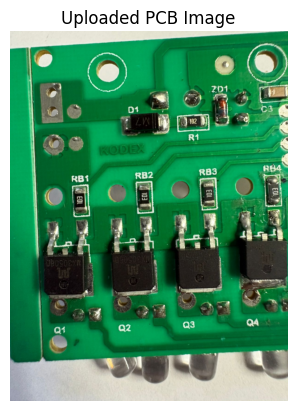

🔍 Running SAM... please wait (takes ~30-60 s)...
✅ SAM detected 55 regions/components!


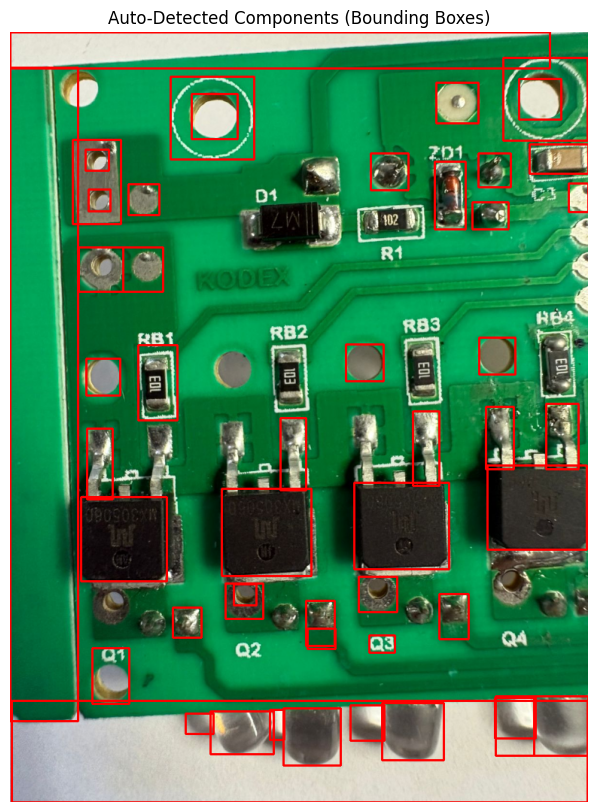

💾 Output saved as: pcb_with_boxes_optimized.jpg
✅ SAM model loaded successfully!
📤 Please upload your PCB image (e.g., pcb_sample.jpg)


KeyboardInterrupt: 

In [3]:
# =====================================
# STEP 1: Install required dependencies
# =====================================
!pip install segment-anything opencv-python matplotlib torch torchvision -q

# =====================================
# STEP 2: Import and load SAM (ViT-B)
# =====================================
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import cv2, torch, numpy as np, matplotlib.pyplot as plt
from google.colab import files

# Download pretrained model
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth

# Load lightweight version of SAM
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
print("✅ SAM model loaded successfully!")

# =====================================
# STEP 3: Upload your PCB image
# =====================================
print("📤 Please upload your PCB image (e.g., pcb_sample.jpg)")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"✅ Image uploaded: {image_path}")

image = cv2.imread(image_path)
if image is None:
    raise ValueError("❌ Image not found or failed to load.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# =====================================
# STEP 4: Resize image to save RAM
# =====================================
max_size = 1024     # reduce resolution if needed
h, w = image.shape[:2]
scale = max_size / max(h, w)
if scale < 1:
    image = cv2.resize(image, (int(w*scale), int(h*scale)))
print(f"🧩 Resized image to: {image.shape[1]}x{image.shape[0]}")

plt.imshow(image)
plt.title("Uploaded PCB Image")
plt.axis('off')
plt.show()

# =====================================
# STEP 5: Configure lightweight SAM mask generator
# =====================================
mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side=16,          # fewer sampling points (default 32)
    pred_iou_thresh=0.88,        # higher confidence
    stability_score_thresh=0.92, # ignore uncertain masks
    crop_n_layers=0,             # disable multiscale
    min_mask_region_area=500     # skip tiny noise regions
)

# =====================================
# STEP 6: Run SAM segmentation
# =====================================
print("🔍 Running SAM... please wait (takes ~30-60 s)...")
masks = mask_generator.generate(image)
print(f"✅ SAM detected {len(masks)} regions/components!")

# =====================================
# STEP 7: Draw bounding boxes around detected components
# =====================================
boxed = image.copy()
for m in masks:
    seg = m["segmentation"].astype('uint8')
    x, y, w, h = cv2.boundingRect(seg)
    if w*h > 400:   # filter small boxes
        cv2.rectangle(boxed, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(boxed)
plt.title("Auto-Detected Components (Bounding Boxes)")
plt.axis('off')
plt.show()

# =====================================
# STEP 8: Save output
# =====================================
out_path = "pcb_with_boxes_optimized.jpg"
cv2.imwrite(out_path, cv2.cvtColor(boxed, cv2.COLOR_RGB2BGR))
print(f"💾 Output saved as: {out_path}")
# =====================================
# STEP 1: Install required dependencies
# =====================================
!pip install segment-anything opencv-python matplotlib torch torchvision -q

# =====================================
# STEP 2: Import and load SAM (ViT-B)
# =====================================
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
import cv2, torch, numpy as np, matplotlib.pyplot as plt
from google.colab import files

# Download pretrained model
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth

# Load lightweight version of SAM
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
print("✅ SAM model loaded successfully!")

# =====================================
# STEP 3: Upload your PCB image
# =====================================
print("📤 Please upload your PCB image (e.g., pcb_sample.jpg)")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"✅ Image uploaded: {image_path}")

image = cv2.imread(image_path)
if image is None:
    raise ValueError("❌ Image not found or failed to load.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# =====================================
# STEP 4: Resize image to save RAM
# =====================================
max_size = 1024     # reduce resolution if needed
h, w = image.shape[:2]
scale = max_size / max(h, w)
if scale < 1:
    image = cv2.resize(image, (int(w*scale), int(h*scale)))
print(f"🧩 Resized image to: {image.shape[1]}x{image.shape[0]}")

plt.imshow(image)
plt.title("Uploaded PCB Image")
plt.axis('off')
plt.show()

# =====================================
# STEP 5: Configure lightweight SAM mask generator
# =====================================
mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side=16,          # fewer sampling points (default 32)
    pred_iou_thresh=0.88,        # higher confidence
    stability_score_thresh=0.92, # ignore uncertain masks
    crop_n_layers=0,             # disable multiscale
    min_mask_region_area=500     # skip tiny noise regions
)

# =====================================
# STEP 6: Run SAM segmentation
# =====================================
print("🔍 Running SAM... please wait (takes ~30-60 s)...")
masks = mask_generator.generate(image)
print(f"✅ SAM detected {len(masks)} regions/components!")

# =====================================
# STEP 7: Draw bounding boxes around detected components
# =====================================
boxed = image.copy()
for m in masks:
    seg = m["segmentation"].astype('uint8')
    x, y, w, h = cv2.boundingRect(seg)
    if w*h > 400:   # filter small boxes
        cv2.rectangle(boxed, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(boxed)
plt.title("Auto-Detected Components (Bounding Boxes)")
plt.axis('off')
plt.show()

# =====================================
# STEP 8: Save output
# =====================================
out_path = "pcb_with_boxes_optimized.jpg"
cv2.imwrite(out_path, cv2.cvtColor(boxed, cv2.COLOR_RGB2BGR))
print(f"💾 Output saved as: {out_path}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ SAM model loaded successfully!
📤 Please upload your PCB image (e.g., pcb_sample.jpg)


Saving hosa.jpeg to hosa (1).jpeg
✅ Image uploaded: hosa (1).jpeg
🧩 Resized image to: 768x1024


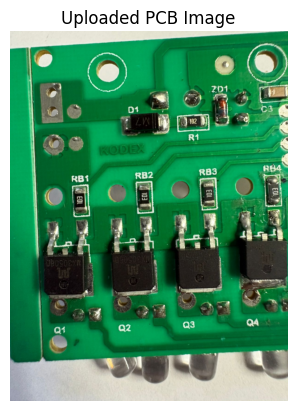

🔍 Running SAM... please wait (takes ~30-60 s)...
✅ SAM detected 35 regions/components!


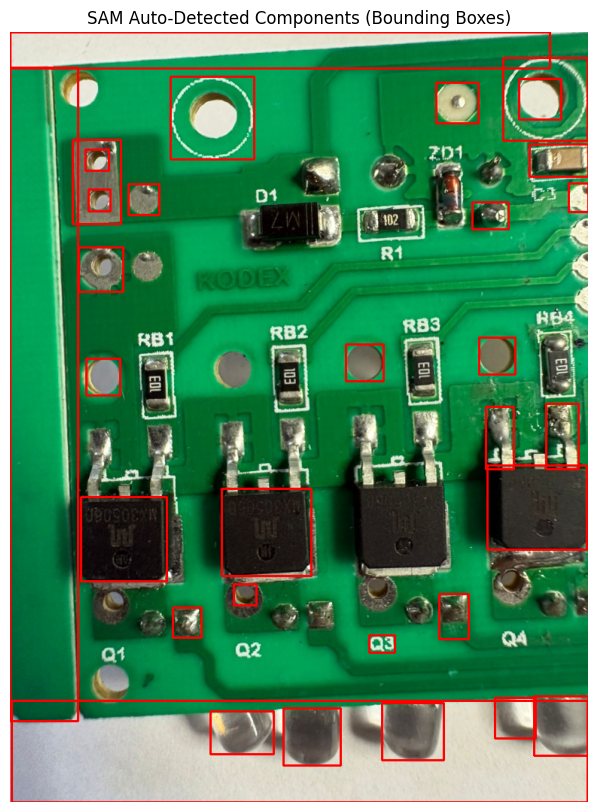

💾 SAM output saved as: pcb_with_boxes_optimized.jpg
🚀 Loading YOLO model...
✅ YOLO model loaded successfully!
🔍 Running YOLO inference with high confidence (0.6)...

image 1/1 /content/hosa (1).jpeg: 640x480 (no detections), 95.3ms
Speed: 3.8ms preprocess, 95.3ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict


error: OpenCV(4.12.0) /io/opencv/modules/core/src/arithm.cpp:662: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [4]:
# =====================================
# STEP 1: Install required dependencies
# =====================================
!pip install segment-anything opencv-python matplotlib torch torchvision ultralytics -q

# =====================================
# STEP 2: Import and load SAM (ViT-B)
# =====================================
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
from ultralytics import YOLO
import cv2, torch, numpy as np, matplotlib.pyplot as plt
from google.colab import files

# Download pretrained model
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth

# Load lightweight version of SAM
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
print("✅ SAM model loaded successfully!")

# =====================================
# STEP 3: Upload your PCB image
# =====================================
print("📤 Please upload your PCB image (e.g., pcb_sample.jpg)")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
print(f"✅ Image uploaded: {image_path}")

image = cv2.imread(image_path)
if image is None:
    raise ValueError("❌ Image not found or failed to load.")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# =====================================
# STEP 4: Resize image to save RAM
# =====================================
max_size = 1024     # reduce resolution if needed
h, w = image.shape[:2]
scale = max_size / max(h, w)
if scale < 1:
    image = cv2.resize(image, (int(w*scale), int(h*scale)))
print(f"🧩 Resized image to: {image.shape[1]}x{image.shape[0]}")

plt.imshow(image)
plt.title("Uploaded PCB Image")
plt.axis('off')
plt.show()

# =====================================
# STEP 5: Configure lightweight SAM mask generator
# =====================================
mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side=16,          # fewer sampling points (default 32)
    pred_iou_thresh=0.92,        # increased confidence level
    stability_score_thresh=0.95, # ignore uncertain masks
    crop_n_layers=0,             # disable multiscale
    min_mask_region_area=800     # skip tiny noise regions
)

# =====================================
# STEP 6: Run SAM segmentation
# =====================================
print("🔍 Running SAM... please wait (takes ~30-60 s)...")
masks = mask_generator.generate(image)
print(f"✅ SAM detected {len(masks)} regions/components!")

# =====================================
# STEP 7: Draw bounding boxes around detected components
# =====================================
boxed = image.copy()
for m in masks:
    seg = m["segmentation"].astype('uint8')
    x, y, w, h = cv2.boundingRect(seg)
    if w*h > 400:   # filter small boxes
        cv2.rectangle(boxed, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(boxed)
plt.title("SAM Auto-Detected Components (Bounding Boxes)")
plt.axis('off')
plt.show()

# =====================================
# STEP 8: Save SAM output
# =====================================
out_path = "pcb_with_boxes_optimized.jpg"
cv2.imwrite(out_path, cv2.cvtColor(boxed, cv2.COLOR_RGB2BGR))
print(f"💾 SAM output saved as: {out_path}")

# =====================================
# STEP 9: YOLO MODEL INTEGRATION
# =====================================
print("🚀 Loading YOLO model...")

# Load a pretrained YOLOv8n model (you can replace with your own path)
yolo_model = YOLO("yolov8n.pt")  # lightweight model for detection
print("✅ YOLO model loaded successfully!")

# Run YOLO inference with higher confidence threshold
print("🔍 Running YOLO inference with high confidence (0.6)...")
yolo_results = yolo_model.predict(source=image_path, conf=0.6, save=True)

# =====================================
# STEP 10: Visualize YOLO + SAM Results Together
# =====================================
yolo_image = cv2.imread(image_path)
for r in yolo_results:
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        conf = float(box.conf)
        label = str(r.names[int(box.cls)])
        if conf > 0.6:  # confidence threshold
            cv2.rectangle(yolo_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(yolo_image, f"{label} {conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Combine SAM (blue boxes) + YOLO (green boxes)
combined = cv2.addWeighted(cv2.cvtColor(boxed, cv2.COLOR_RGB2BGR), 0.6, yolo_image, 0.6, 0)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Combined SAM (Blue) + YOLO (Green) Detections")
plt.axis('off')
plt.show()

# =====================================
# STEP 11: Save final combined output
# =====================================
final_path = "pcb_sam_yolo_combined.jpg"
cv2.imwrite(final_path, combined)
print(f"💾 Final SAM + YOLO output saved as: {final_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully!
✅ Found and loaded latest YOLO model:
/content/drive/My Drive/YOLO/training_results_pcb/pcb_yolov8_v1/weights/best.pt

📸 Upload your MASTER and TEST PCB images:


Saving dummy.jpg to dummy (1).jpg
Saving dummy1.jpg to dummy1 (5).jpg
✅ Images loaded:
 - Master: dummy (1).jpg
 - Test: dummy1 (5).jpg
📏 Cropped PCB region: x=578, y=460, w=1575, h=3299
📏 Cropped PCB region: x=0, y=1339, w=2708, h=1247

0: 640x320 7 ICss, 10 capacitorss, 2 resistorss, 39.1ms
Speed: 2.1ms preprocess, 39.1ms inference, 32.4ms postprocess per image at shape (1, 3, 640, 320)

0: 320x640 7 ICss, 12 capacitorss, 2 resistorss, 35.6ms
Speed: 2.5ms preprocess, 35.6ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)
✅ YOLO detection complete.
📂 Results saved to: /content/pcb_output


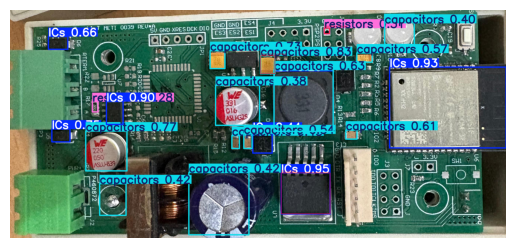


🟥 Visual comparison saved at: /content/pcb_output/difference_visual.png
📊 JSON differences saved at: /content/pcb_output/differences.json

🔍 Loading SAM model for segmentation refinement...
✅ SAM model loaded successfully!
🎯 Running SAM on detected regions from TEST PCB...


KeyboardInterrupt: 

In [8]:
# ==============================================================
# 🧠 PCB COMPONENT COMPARISON + SAM SEGMENTATION + OpenCV Overlay
# ==============================================================

!pip install -q ultralytics opencv-python Pillow matplotlib numpy torch torchvision segment-anything

# ==============================================================
# 🧩 Imports
# ==============================================================
import os, cv2, json, numpy as np, matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files, drive
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# ==============================================================
# ⚙️ Setup
# ==============================================================
OUT_DIR = "/content/pcb_output"
os.makedirs(OUT_DIR, exist_ok=True)

drive.mount('/content/drive')
print("✅ Google Drive mounted successfully!")

# ==============================================================
# 🔍 Auto-Find the Latest YOLO Model (best.pt)
# ==============================================================
search_root = "/content/drive/My Drive/YOLO"
found_models = []

for root, dirs, files_in_dir in os.walk(search_root):
    for f in files_in_dir:
        if f == "best.pt":
            full_path = os.path.join(root, f)
            found_models.append((full_path, os.path.getmtime(full_path)))

if not found_models:
    raise FileNotFoundError("❌ No 'best.pt' found in your Drive. Please train or upload the model.")

found_models.sort(key=lambda x: x[1], reverse=True)
MODEL_PATH = found_models[0][0]

print(f"✅ Found and loaded latest YOLO model:\n{MODEL_PATH}")
model = YOLO(MODEL_PATH)

# ==============================================================
# ✂️ Auto-Crop PCB Area (Green Segmentation)
# ==============================================================
def auto_crop_board(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([25, 30, 30])
    upper_green = np.array([100, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("⚠️ No green PCB region detected — using full image.")
        return image
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    print(f"📏 Cropped PCB region: x={x}, y={y}, w={w}, h={h}")
    return image[y:y+h, x:x+w]

# ==============================================================
# 🧩 YOLO Detection Function
# ==============================================================
def detect_with_yolo(image, prefix="PCB"):
    results = model(image)
    annotated = results[0].plot()
    comps = []
    for i, box in enumerate(results[0].boxes):
        cls_id = int(box.cls)
        label = results[0].names[cls_id]
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        comps.append({
            "id": f"{prefix}{i}",
            "label": label,
            "position": [int(x1), int(y1), int(x2 - x1), int(y2 - y1)]
        })
    return annotated, comps

# ==============================================================
# 📤 Upload MASTER and TEST PCB Images
# ==============================================================
print("\n📸 Upload your MASTER and TEST PCB images:")
uploaded = files.upload()
paths = list(uploaded.keys())

if len(paths) < 2:
    raise ValueError("❌ Please upload both MASTER and TEST PCB images.")

master_img = cv2.imread(paths[0])
test_img   = cv2.imread(paths[1])
print(f"✅ Images loaded:\n - Master: {paths[0]}\n - Test: {paths[1]}")

# ==============================================================
# 🔍 YOLO Detection + JSON Export
# ==============================================================
master_crop = auto_crop_board(master_img)
test_crop   = auto_crop_board(test_img)

master_detected, master_comps = detect_with_yolo(master_crop, "M")
test_detected, test_comps = detect_with_yolo(test_crop, "T")

master_json = {"components": master_comps}
test_json   = {"components": test_comps}

cv2.imwrite(f"{OUT_DIR}/master_detected.png", master_detected)
cv2.imwrite(f"{OUT_DIR}/test_detected.png", test_detected)
with open(f"{OUT_DIR}/master.json", "w") as f: json.dump(master_json, f, indent=2)
with open(f"{OUT_DIR}/test.json", "w") as f: json.dump(test_json, f, indent=2)

print(f"✅ YOLO detection complete.\n📂 Results saved to: {OUT_DIR}")

# ==============================================================
# 🔁 JSON Comparison + Visual Markup
# ==============================================================
def compare_json(master, test):
    diffs = []
    for m in master["components"]:
        match = next((t for t in test["components"] if t["label"] == m["label"]), None)
        if not match:
            diffs.append({"label": m["label"], "status": "missing", "position": m["position"]})
        else:
            dx = abs(m["position"][0] - match["position"][0])
            dy = abs(m["position"][1] - match["position"][1])
            if dx > 10 or dy > 10:
                diffs.append({
                    "label": m["label"],
                    "status": "moved",
                    "old_position": m["position"],
                    "new_position": match["position"]
                })
    return {"differences": diffs}

def visualize_differences(diff_json, test_img):
    for d in diff_json["differences"]:
        if d["status"] == "missing":
            x, y, w, h = d["position"]
            cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(test_img, f"{d['label']} missing", (x, y-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
        elif d["status"] == "moved":
            nx, ny, nw, nh = d["new_position"]
            cv2.rectangle(test_img, (nx, ny), (nx+nw, ny+nh), (0,0,255), 2)
            cv2.putText(test_img, f"{d['label']} moved", (nx, ny-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
    return test_img

diff_json = compare_json(master_json, test_json)
with open(f"{OUT_DIR}/differences.json", "w") as f: json.dump(diff_json, f, indent=2)

visualized = visualize_differences(diff_json, test_detected.copy())
cv2.imwrite(f"{OUT_DIR}/difference_visual.png", visualized)

plt.imshow(cv2.cvtColor(visualized, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("\n🟥 Visual comparison saved at:", f"{OUT_DIR}/difference_visual.png")
print("📊 JSON differences saved at:", f"{OUT_DIR}/differences.json")

# ==============================================================
# 🧠 SAM SEGMENTATION REFINEMENT + OpenCV
# ==============================================================
print("\n🔍 Loading SAM model for segmentation refinement...")
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")

mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side=16,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.95,
    crop_n_layers=0,
    min_mask_region_area=800
)
print("✅ SAM model loaded successfully!")

# Run SAM on TEST image regions
print("🎯 Running SAM on detected regions from TEST PCB...")
sam_refined = test_crop.copy()

for comp in test_comps:
    x, y, w, h = comp["position"]
    roi = test_crop[y:y+h, x:x+w]
    if roi.size == 0: continue
    masks = mask_generator.generate(roi)
    for m in masks:
        seg = m["segmentation"].astype('uint8')
        contours, _ = cv2.findContours(seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            cv2.drawContours(sam_refined[y:y+h, x:x+w], [cnt], -1, (255, 0, 0), 1)

combined_final = cv2.addWeighted(visualized, 0.6, sam_refined, 0.6, 0)
cv2.imwrite(f"{OUT_DIR}/final_combined_sam_overlay.png", combined_final)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(combined_final, cv2.COLOR_BGR2RGB))
plt.title("Final Combined Output (YOLO + SAM + Comparison)")
plt.axis("off")
plt.show()

print("\n✅ Complete Pipeline Executed Successfully!")
print(f"📁 All outputs saved in: {OUT_DIR}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully!
✅ Found and loaded latest YOLO model:
/content/drive/My Drive/YOLO/training_results_pcb/pcb_yolov8_v1/weights/best.pt

📸 Upload your MASTER and TEST PCB images:


Saving dummy.jpg to dummy (2).jpg
Saving dummy1.jpg to dummy1 (6).jpg
✅ Images loaded:
 - Master: dummy (2).jpg
 - Test: dummy1 (6).jpg
📏 Cropped PCB region: x=578, y=460, w=1575, h=3299
📏 Cropped PCB region: x=0, y=1339, w=2708, h=1247

0: 640x320 7 ICss, 10 capacitorss, 2 resistorss, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 320)

0: 320x640 7 ICss, 12 capacitorss, 2 resistorss, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 640)
✅ YOLO detection complete.
📂 Results saved to: /content/pcb_output


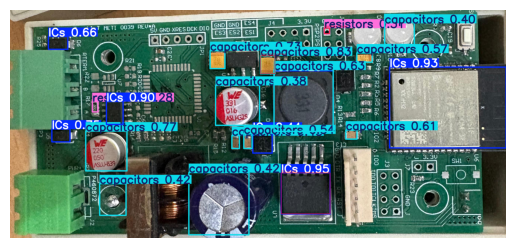


🟥 Visual comparison saved at: /content/pcb_output/difference_visual.png
📊 JSON differences saved at: /content/pcb_output/differences.json

⚡ Loading optimized SAM (ViT-B) for segmentation refinement...
✅ Optimized SAM (ViT-B) loaded successfully!
🎯 Running SAM on detected regions from TEST PCB...


KeyboardInterrupt: 

In [11]:
# ==============================================================
# 🧠 PCB COMPONENT COMPARISON + YOLOv8 + SAM (Optimized ViT-B) + OpenCV Overlay
# ==============================================================

!pip install -q ultralytics opencv-python Pillow matplotlib numpy torch torchvision segment-anything

# ==============================================================
# 🧩 Imports
# ==============================================================
import os, cv2, json, numpy as np, matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files, drive
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# ==============================================================
# ⚙️ Setup
# ==============================================================
OUT_DIR = "/content/pcb_output"
os.makedirs(OUT_DIR, exist_ok=True)

drive.mount('/content/drive')
print("✅ Google Drive mounted successfully!")

# ==============================================================
# 🔍 Auto-Find the Latest YOLO Model (best.pt)
# ==============================================================
search_root = "/content/drive/My Drive/YOLO"
found_models = []

for root, dirs, files_in_dir in os.walk(search_root):
    for f in files_in_dir:
        if f == "best.pt":
            full_path = os.path.join(root, f)
            found_models.append((full_path, os.path.getmtime(full_path)))

if not found_models:
    raise FileNotFoundError("❌ No 'best.pt' found in your Drive. Please train or upload the model.")

found_models.sort(key=lambda x: x[1], reverse=True)
MODEL_PATH = found_models[0][0]

print(f"✅ Found and loaded latest YOLO model:\n{MODEL_PATH}")
model = YOLO(MODEL_PATH)

# ==============================================================
# ✂️ Auto-Crop PCB Area (Green Segmentation)
# ==============================================================
def auto_crop_board(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_green = np.array([25, 30, 30])
    upper_green = np.array([100, 255, 255])
    mask = cv2.inRange(hsv, lower_green, upper_green)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print("⚠️ No green PCB region detected — using full image.")
        return image
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    print(f"📏 Cropped PCB region: x={x}, y={y}, w={w}, h={h}")
    return image[y:y+h, x:x+w]

# ==============================================================
# 🧩 YOLO Detection Function
# ==============================================================
def detect_with_yolo(image, prefix="PCB"):
    results = model(image)
    annotated = results[0].plot()
    comps = []
    for i, box in enumerate(results[0].boxes):
        cls_id = int(box.cls)
        label = results[0].names[cls_id]
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        comps.append({
            "id": f"{prefix}{i}",
            "label": label,
            "position": [int(x1), int(y1), int(x2 - x1), int(y2 - y1)]
        })
    return annotated, comps

# ==============================================================
# 📤 Upload MASTER and TEST PCB Images
# ==============================================================
print("\n📸 Upload your MASTER and TEST PCB images:")
uploaded = files.upload()
paths = list(uploaded.keys())

if len(paths) < 2:
    raise ValueError("❌ Please upload both MASTER and TEST PCB images.")

master_img = cv2.imread(paths[0])
test_img   = cv2.imread(paths[1])
print(f"✅ Images loaded:\n - Master: {paths[0]}\n - Test: {paths[1]}")

# ==============================================================
# 🔍 YOLO Detection + JSON Export
# ==============================================================
master_crop = auto_crop_board(master_img)
test_crop   = auto_crop_board(test_img)

master_detected, master_comps = detect_with_yolo(master_crop, "M")
test_detected, test_comps = detect_with_yolo(test_crop, "T")

master_json = {"components": master_comps}
test_json   = {"components": test_comps}

cv2.imwrite(f"{OUT_DIR}/master_detected.png", master_detected)
cv2.imwrite(f"{OUT_DIR}/test_detected.png", test_detected)
with open(f"{OUT_DIR}/master.json", "w") as f: json.dump(master_json, f, indent=2)
with open(f"{OUT_DIR}/test.json", "w") as f: json.dump(test_json, f, indent=2)

print(f"✅ YOLO detection complete.\n📂 Results saved to: {OUT_DIR}")

# ==============================================================
# 🔁 JSON Comparison + Visual Markup
# ==============================================================
def compare_json(master, test):
    diffs = []
    for m in master["components"]:
        match = next((t for t in test["components"] if t["label"] == m["label"]), None)
        if not match:
            diffs.append({"label": m["label"], "status": "missing", "position": m["position"]})
        else:
            dx = abs(m["position"][0] - match["position"][0])
            dy = abs(m["position"][1] - match["position"][1])
            if dx > 10 or dy > 10:
                diffs.append({
                    "label": m["label"],
                    "status": "moved",
                    "old_position": m["position"],
                    "new_position": match["position"]
                })
    return {"differences": diffs}

def visualize_differences(diff_json, test_img):
    for d in diff_json["differences"]:
        if d["status"] == "missing":
            x, y, w, h = d["position"]
            cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(test_img, f"{d['label']} missing", (x, y-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
        elif d["status"] == "moved":
            nx, ny, nw, nh = d["new_position"]
            cv2.rectangle(test_img, (nx, ny), (nx+nw, ny+nh), (0,0,255), 2)
            cv2.putText(test_img, f"{d['label']} moved", (nx, ny-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1)
    return test_img

diff_json = compare_json(master_json, test_json)
with open(f"{OUT_DIR}/differences.json", "w") as f: json.dump(diff_json, f, indent=2)

visualized = visualize_differences(diff_json, test_detected.copy())
cv2.imwrite(f"{OUT_DIR}/difference_visual.png", visualized)

plt.imshow(cv2.cvtColor(visualized, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("\n🟥 Visual comparison saved at:", f"{OUT_DIR}/difference_visual.png")
print("📊 JSON differences saved at:", f"{OUT_DIR}/differences.json")

# ==============================================================
# 🧠 OPTIMIZED SAM SEGMENTATION (ViT-B) + OpenCV Overlay
# ==============================================================
print("\n⚡ Loading optimized SAM (ViT-B) for segmentation refinement...")
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth

sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")

mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side=8,           # fewer sample points
    pred_iou_thresh=0.9,         # high confidence
    stability_score_thresh=0.95, # stable masks only
    crop_n_layers=0,             # disable multi-scale
    min_mask_region_area=1000    # ignore small regions
)
print("✅ Optimized SAM (ViT-B) loaded successfully!")

# Run SAM refinement on TEST PCB
print("🎯 Running SAM on detected regions from TEST PCB...")
sam_refined = test_crop.copy()

for comp in test_comps:
    x, y, w, h = comp["position"]
    roi = test_crop[y:y+h, x:x+w]
    if roi.size == 0:
        continue
    masks = mask_generator.generate(roi)
    for m in masks:
        seg = m["segmentation"].astype('uint8')
        contours, _ = cv2.findContours(seg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            cv2.drawContours(sam_refined[y:y+h, x:x+w], [cnt], -1, (255, 0, 0), 1)

# Combine YOLO + SAM + Comparison Results
combined_final = cv2.addWeighted(visualized, 0.6, sam_refined, 0.6, 0)
cv2.imwrite(f"{OUT_DIR}/final_combined_sam_overlay_fast.png", combined_final)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(combined_final, cv2.COLOR_BGR2RGB))
plt.title("Final Combined Output (YOLO + SAM + Comparison)")
plt.axis("off")
plt.show()

print("\n✅ Full Pipeline Executed Successfully!")
print(f"📁 All outputs saved in: {OUT_DIR}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive
✅ Google Drive mounted successfully!
✅ Using YOLO model: /content/drive/My Drive/YOLO/training_results_pcb/pcb_yolov8_v1/weights/best.pt
📸 Please upload a PCB image:


Saving hosa.jpeg to hosa.jpeg
✅ Image uploaded: hosa.jpeg
🟩 Running YOLO detection...
✅ YOLO detected 4 components.
🔵 Loading SAM model...
✅ SAM model ready!
🔵 Running SAM on uncovered regions...
✅ SAM added 11 new boxes.
🟠 Running OpenCV edge detection as backup...
✅ OpenCV added 92 boxes.


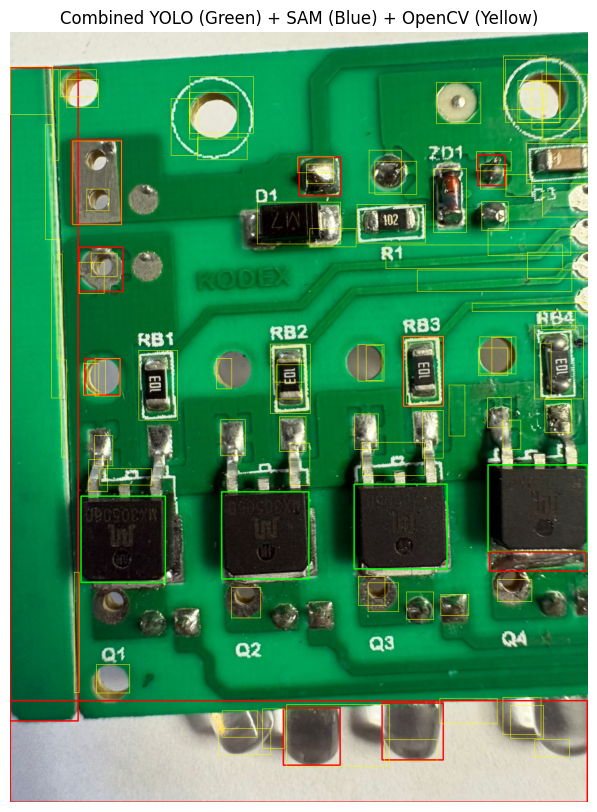

💾 Saved combined detection image at: /content/pcb_output/final_combined_detections.png
✂️ Cropping detected regions...
✅ Cropped 107 component regions.
📁 Crops saved to: /content/pcb_output/crops


In [1]:
# ==============================================================
# 🧠 PCB COMPONENT DETECTION — YOLO + SAM + OpenCV + Cropping
# ==============================================================

!pip install -q ultralytics opencv-python Pillow matplotlib numpy torch torchvision segment-anything

# ==============================================================
# 🧩 Imports
# ==============================================================
import os, cv2, numpy as np, matplotlib.pyplot as plt
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator
from google.colab import files, drive

# ==============================================================
# ⚙️ Setup
# ==============================================================
OUT_DIR = "/content/pcb_output"
CROP_DIR = f"{OUT_DIR}/crops"
os.makedirs(CROP_DIR, exist_ok=True)

drive.mount('/content/drive')
print("✅ Google Drive mounted successfully!")

# ==============================================================
# 🔍 Load YOLO model
# ==============================================================
# Auto-find your trained YOLO model (latest best.pt)
search_root = "/content/drive/My Drive/YOLO"
found_models = []
for root, dirs, files_in_dir in os.walk(search_root):
    for f in files_in_dir:
        if f == "best.pt":
            found_models.append(os.path.join(root, f))
if not found_models:
    raise FileNotFoundError("❌ No best.pt found in your Drive.")
MODEL_PATH = sorted(found_models, key=os.path.getmtime, reverse=True)[0]
print(f"✅ Using YOLO model: {MODEL_PATH}")

model = YOLO(MODEL_PATH)

# ==============================================================
# 📤 Upload a single PCB image
# ==============================================================
print("📸 Please upload a PCB image:")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
if image is None:
    raise ValueError("❌ Image failed to load.")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(f"✅ Image uploaded: {image_path}")

# ==============================================================
# 🔍 STEP 1 — YOLO Detection
# ==============================================================
print("🟩 Running YOLO detection...")
yolo_results = model.predict(source=image_rgb, conf=0.6, verbose=False)
yolo_boxes = []

for result in yolo_results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0].cpu().numpy())
        conf = float(box.conf)
        cls = int(box.cls)
        label = result.names[cls]
        if conf > 0.6:
            yolo_boxes.append((x1, y1, x2, y2, label, conf))

yolo_image = image_rgb.copy()
for (x1, y1, x2, y2, label, conf) in yolo_boxes:
    cv2.rectangle(yolo_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(yolo_image, f"{label}", (x1, y1 - 5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

print(f"✅ YOLO detected {len(yolo_boxes)} components.")

# ==============================================================
# 🧠 STEP 2 — SAM Segmentation (for missing/unboxed areas)
# ==============================================================
print("🔵 Loading SAM model...")
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth -O sam_vit_b.pth

sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b.pth")
mask_generator = SamAutomaticMaskGenerator(
    sam,
    points_per_side=8,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.95,
    crop_n_layers=0,
    min_mask_region_area=1000
)
print("✅ SAM model ready!")

# Create a mask to track YOLO-covered areas
mask_yolo = np.zeros(image.shape[:2], dtype=np.uint8)
for (x1, y1, x2, y2, _, _) in yolo_boxes:
    cv2.rectangle(mask_yolo, (x1, y1), (x2, y2), 255, -1)

# Run SAM only on uncovered regions
inverse_mask = cv2.bitwise_not(mask_yolo)
uncovered = cv2.bitwise_and(image_rgb, image_rgb, mask=inverse_mask)

print("🔵 Running SAM on uncovered regions...")
masks = mask_generator.generate(uncovered)
sam_image = image_rgb.copy()
sam_boxes = []

for m in masks:
    seg = m["segmentation"].astype('uint8')
    x, y, w, h = cv2.boundingRect(seg)
    overlap = np.any(mask_yolo[y:y+h, x:x+w] > 0)
    if not overlap and w*h > 1000:  # skip overlapping YOLO boxes
        cv2.rectangle(sam_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        sam_boxes.append((x, y, x+w, y+h))

print(f"✅ SAM added {len(sam_boxes)} new boxes.")

# ==============================================================
# ⚙️ STEP 3 — OpenCV Edge-based Backup Detection
# ==============================================================
print("🟠 Running OpenCV edge detection as backup...")
gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 60, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
opencv_boxes = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    overlap = np.any(mask_yolo[y:y+h, x:x+w] > 0)
    if w*h > 2000 and not overlap:
        cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 255, 0), 1)
        opencv_boxes.append((x, y, x+w, y+h))

print(f"✅ OpenCV added {len(opencv_boxes)} boxes.")

# ==============================================================
# 🖼️ STEP 4 — Combine and Visualize All Boxes
# ==============================================================
final = image_rgb.copy()

# Draw YOLO boxes (green)
for (x1, y1, x2, y2, _, _) in yolo_boxes:
    cv2.rectangle(final, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Draw SAM boxes (blue)
for (x1, y1, x2, y2) in sam_boxes:
    cv2.rectangle(final, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Draw OpenCV boxes (yellow)
for (x1, y1, x2, y2) in opencv_boxes:
    cv2.rectangle(final, (x1, y1), (x2, y2), (255, 255, 0), 1)

plt.figure(figsize=(10, 10))
plt.imshow(final)
plt.title("Combined YOLO (Green) + SAM (Blue) + OpenCV (Yellow)")
plt.axis('off')
plt.show()

cv2.imwrite(f"{OUT_DIR}/final_combined_detections.png", cv2.cvtColor(final, cv2.COLOR_RGB2BGR))
print(f"💾 Saved combined detection image at: {OUT_DIR}/final_combined_detections.png")

# ==============================================================
# ✂️ STEP 5 — Auto-Cropping of All Detected Components
# ==============================================================
print("✂️ Cropping detected regions...")
all_boxes = yolo_boxes + [(x1, y1, x2, y2, "sam", 1) for (x1, y1, x2, y2) in sam_boxes] + [(x1, y1, x2, y2, "opencv", 1) for (x1, y1, x2, y2) in opencv_boxes]
for i, (x1, y1, x2, y2, src, _) in enumerate(all_boxes):
    crop = image[y1:y2, x1:x2]
    if crop.size == 0: continue
    cv2.imwrite(f"{CROP_DIR}/{src}_crop_{i}.png", crop)

print(f"✅ Cropped {len(all_boxes)} component regions.")
print(f"📁 Crops saved to: {CROP_DIR}")
